# Chapter 5
#### Nicetak

In [1]:
import datetime; datetime.datetime.now().strftime('%B %-d, %Y')

'February 17, 2022'

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import math
from scipy.cluster import hierarchy
import numpy as np

## 5.1
>図5.7のグラフにおいて, $s$から$t$への最短路を求めよ.

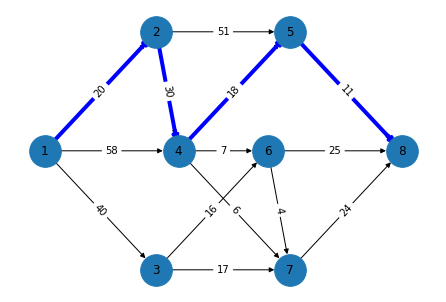

In [3]:
G = nx.DiGraph()
G.add_nodes_from(range(1, 9))
srcs = [1, 1, 1, 2, 2, 3, 3, 4, 4, 4, 5, 6, 6, 7]
dists = [2, 3, 4, 4, 5, 6, 7, 5, 6, 7, 8, 7, 8, 8]
weights = [20, 40, 58, 30, 51, 16, 17, 18, 7, 6, 11, 4, 25, 24]
G.add_weighted_edges_from([(s, d, w) for s, d, w in zip(srcs, dists, weights)])

pos = {1: [-4, 0], 2: [-1.5, 2.5], 3: [-1.5, -2.5], 4: [-1, 0], \
    5: [1.5, 2.5], 6:[1, 0], 7:[1.5, -2.5], 8: [4, 0]}
edge_labels = nx.get_edge_attributes(G, "weight")

path = nx.dijkstra_path(G, 1, 8)

nx.draw(G, pos, node_size = 1000, with_labels = True)
nx.draw_networkx_edges(G, pos, \
    edgelist = [(path[i], path[i + 1]) for i in range(len(path) - 1)], \
    width=4, edge_color="b")
nx.draw_networkx_edge_labels(G, pos = pos, edge_labels = edge_labels);


## 5.2
>最小木問題の解法として, クラスカルのアルゴリズムの正当性を示せ. また, プリムのアルゴリズムの正当性を示せ.


### クラスカルのアルゴリズム
以下の命題が同値であることを示す. クラスカルのアルゴリズムは命題Bを満たす.
なぜなら, $e$ がつなぐ点 $s, t$ が異なる木に属している間結合しなかったことから,
基本サイクル内のすべての辺より重みが小さいことが言えるからである.
- *A:* $T$ は最小全域木である
- *B:* $T$ に含まれない任意の辺 $e$ に対して, $T$ と $e$ に関する基本サイクルにおいて $e$ の重みは最大である.

**A → B** 自明である. 基本サイクル内の $f$ よりも重みが小さい場合,
$f$ の代わりに $e$ を結合させることで, より小さい全域木が構成できるためである.

**B → A** 任意の全域木 $S$ に含まれる任意の $T$ に含まれない辺 $e$ を考える.
$e$ と $T$ と $e$ に関する基本サイクル上のある一辺を交換することで,
$S$ よりも小さい全域木 $S'$ を構成できる. 任意の $T$ 以外の全域木において, このような,
より小さい全域木を構成できることから, $T$ が最小である.

### プリムのアルゴリズム
**全域木** アルゴリズムの辺のとり方は,　連結であることとサイクルを作らないことは自明である (つまり木である.)
また, もとのグラフが連結グラフであることから, アルゴリズム終了時にすべての頂点を覆う.

**最小性** プリムのアルゴリズムの解 $T$ と最小全域木 $S$が存在したとする.
$T \ne S$ の時, $T$ に含まれるが $S$ に含まれない辺のうち最も早く追加された辺を $e$ とする.
$S$ の最小全域木性から, $S$ と $e$ に関する基本サイクルにおいて, $e$は最大の重みである.
$e$ が追加された際のカットにはその基本サイクルのうちのある辺 $f$ が含まれていたはずである.
そのような辺が存在しない場合, そもそも $e$ が含まれるカットを構成できない.
したがって,　$e$ は $f$ よりも重みが小さいが, これは $e$ の基本サイクルにおける最大性と反する.

## 5.3
>連結な重み付き無向グラフ$G = (V, E, c)$の全域木のうち, 重みが$k$番目に小さいものを第$k$最小全域木とよぶ. 定義より, 第1最小全域木は最小木である. 第2最小全域木を求めるアルゴリズムを考えよ.


第2最小全域木は, 少なくとも１つの辺は最小全域木と異なる辺を用いる. したがって,
- 最小全域木の辺のうち一本を取り除いたグラフにおいて最小全域木を構成
- そのうち, 重みの合計が最も小さいものが第２最小全域木となる

以下では, 図5.10の第２最小全域木を求める. (余談だが, 教科書の図5.10は最小全域木ではない.)

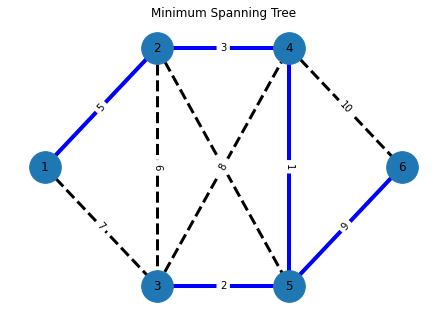

In [4]:
G = nx.Graph()
G.add_nodes_from(range(1, 7))

srcs = [1, 1, 2, 2, 2, 3, 3, 4, 4, 5]
dists = [2, 3, 3, 4, 5, 4, 5, 5, 6, 6]
weights = [5, 7, 6, 3, 4, 8, 2, 1, 10, 9]

G.add_weighted_edges_from([(s, d, w) for s, d, w in zip(srcs, dists, weights)])
edge_labels = nx.get_edge_attributes(G, "weight")

# Minimum Spanning Tree
mst = nx.minimum_spanning_tree(G)

# Plot
pos = {1:[-2.7, 0], 2:[-1, 1], 3:[-1, -1], 4:[1, 1], 5:[1, -1], 6:[2.7, 0]}
nx.draw(G, pos, node_size = 1000, with_labels = True, width=3, style = "dashed")
nx.draw_networkx_edges(G, pos, edgelist = [(u, v) for (u, v, d) in mst.edges(data=True)], width=4, edge_color="b")
nx.draw_networkx_edge_labels(G, pos = pos, edge_labels = edge_labels)
plt.title("Minimum Spanning Tree");

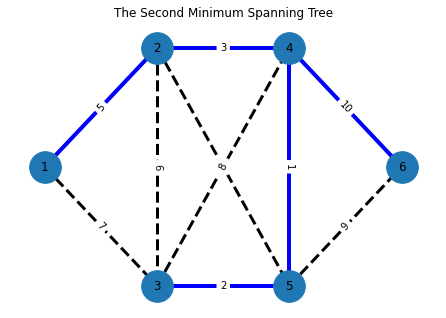

In [5]:
edges_mst = mst.edges(data=True)
sum_weight = 10**9
mst2 = mst.copy()

for (u, v, d) in edges_mst:
    G_tmp = G.copy()
    G_tmp.remove_edge(u, v)
    mst_tmp = nx.minimum_spanning_tree(G_tmp)
    sum_mst = sum([d['weight'] for (u, v, d) in edges_mst])
    if sum_weight > sum_mst:
        mst2 = mst_tmp.copy()

mst2

# Plot
nx.draw(G, pos, node_size = 1000, with_labels = True, width=3, style = "dashed")
nx.draw_networkx_edges(G, pos, edgelist = [(u, v) for (u, v, d) in mst2.edges(data=True)], width=4, edge_color="b")
nx.draw_networkx_edge_labels(G, pos = pos, edge_labels = edge_labels)
plt.title("The Second Minimum Spanning Tree");    


## 5.4
>データ点 $s_1, \dots, s_5$ があり, 各店間の距離が図5.23のように与えられている. この時, 単リンク法によるクラスタリングを行い, デンドログラムを描け.


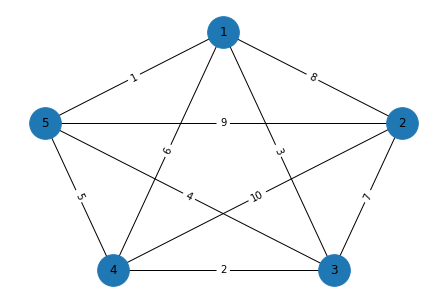

In [17]:
G = nx.Graph()
G.add_nodes_from(range(1, 6))

srcs = [1, 1, 1, 1, 2, 2, 2, 3, 3, 4]
dists = [2, 3, 4, 5, 3, 4, 5, 4, 5, 5]
weights = [8, 3, 6, 1, 7, 10, 9, 2, 4, 5]

G.add_weighted_edges_from([(s, d, w) for s, d, w in zip(srcs, dists, weights)])
edge_labels = nx.get_edge_attributes(G, "weight")
pos = {1: [0, 1], \
       2: [math.cos(math.radians(18)), math.sin(math.radians(18))], \
       3: [math.cos(-math.radians(54)), math.sin(-math.radians(54))], \
       4: [math.cos(-math.radians(126)), math.sin(-math.radians(126))], \
       5: [math.cos(math.radians(162)), math.sin(math.radians(162))]\
    }

nx.draw(G, pos, with_labels = True, node_size = 1000)
nx.draw_networkx_edge_labels(G, pos = pos, edge_labels = edge_labels);

/tmp/ipykernel_571/377803952.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(mat, "single")


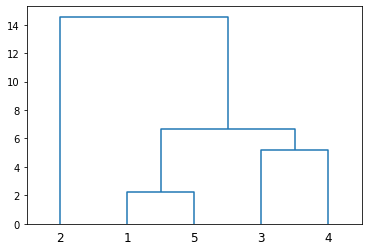

In [18]:
mat = nx.convert_matrix.to_numpy_matrix(G)
Z = hierarchy.linkage(mat, "single")
hierarchy.dendrogram(Z, color_threshold=0, labels = range(1, 6))

plt.show()

## 5.5
>最小費用流問題を利用することで輸送問題 (1.1節の例1.２)を解く方法を考えよ.


輸送問題は経路に容量の制約のない最小費用流問題とみることができる.

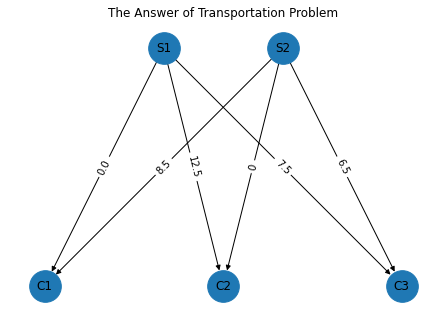

In [8]:
INF = 10**9

G = nx.DiGraph()
G.add_node("S1", demand = -20)
G.add_node("S2", demand = -15)
G.add_node("C1", demand = 8.5)
G.add_node("C2", demand = 12.5)
G.add_node("C3", demand = 14)
G.add_edge("S1", "C1", weight = 1, capacity = INF)
G.add_edge("S1", "C2", weight = 2, capacity = INF)
G.add_edge("S1", "C3", weight = 3, capacity = INF)
G.add_edge("S2", "C1", weight = 4, capacity = INF)
G.add_edge("S2", "C2", weight = 8, capacity = INF)
G.add_edge("S2", "C3", weight = 7, capacity = INF)

dict_flow = nx.min_cost_flow(G)
edge_labels = {(s, k): v for s in ["S1", "S2"] for (k, v) in dict_flow[s].items()}

pos = {"S1": (-1, 2), "S2": (1, 2), "C1": (-3, 0), "C2": (0, 0), "C3": (3, 0)}
nx.draw(G, pos, with_labels = True, node_size = 1000)
nx.draw_networkx_edge_labels(G, pos = pos, edge_labels = edge_labels)
plt.title("The Answer of Transportation Problem");  

## 5.6
>２部グラフのマッチングのうちで辺の数が最大のものを求める問題を, **最大マッチング問題**とよぶ. 最大流問題を利用することで最大マッチング問題を解く方法を考えよ.


２部グラフの左右にスーパーノードをおき, スーパーノードとノード間の辺の容量を1とする.
この時, スーパーノード間の最大流問題は, 各マッチングが流量1と対応するため, ２部グラフのマッチング問題と同一視できる.
なお, もとの２部グラフのノードの容量は, たかだか1の流量しか通る可能性がないので, 1以上の数であればなんでもよい.
以下では例として5.6の解答の図4で与えられる問題を解く.

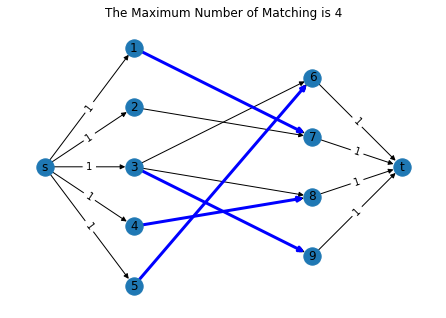

In [9]:
INF = 10**9

G = nx.DiGraph()
G.add_node('s')
G.add_nodes_from(range(1, 10))
G.add_node('t')

for i in range(1, 6):
    G.add_edge('s', i, capacity = 1)

for i in range(6, 10):
    G.add_edge(i, 't', capacity = 1)

G.add_edge(1, 7, capacity = INF)
G.add_edge(2, 7, capacity = INF)
G.add_edge(3, 6, capacity = INF)
G.add_edge(3, 8, capacity = INF)
G.add_edge(3, 9, capacity = INF)
G.add_edge(4, 8, capacity = INF)
G.add_edge(5, 6, capacity = INF)

# Plot attribute
pos = {'s': [-2, 0], 1: [-1, 2], 2: [-1, 1], 3: [-1, 0], 4: [-1, -1], 5: [-1, -2], \
    6: [1, 1.5], 7: [1, 0.5], 8: [1, -0.5], 9: [1, -1.5], 't': [2, 0]}

edge_labels = nx.get_edge_attributes(G, "capacity")
for k, v in edge_labels.items():
    if v == INF:
        edge_labels[k] = ""

# Maximum Flow
flow_value, flow_dict = nx.maximum_flow(G, 's', 't')
edges_matched = [(node, k) for (node, d) in flow_dict.items() for (k, v) in d.items() \
    if v == 1 and str(node) != 's' and str(k) != 't']

# Plot
nx.draw(G, pos, with_labels = True)
nx.draw_networkx_edges(G, pos, edgelist = edges_matched, width=3, edge_color="b")
nx.draw_networkx_edge_labels(G, pos = pos, edge_labels = edge_labels)
plt.title(f"The Maximum Number of Matching is {flow_value}");  